# Purpose 1:
can you write a python code that from an analysis of 8 emotions **(happy, sad, angry, embarrassed, distressed, relaxed, guilty and frustrated)** and **a label of No. of self-harm**, in a time series in patients diagnosed with self-harm disorder, **classify the risk of future self-harm**.


---


To make the classifier use a **gradient boost algorithm with scickit learn
library**, the training is done from data available in .csv format, the dataset consists of **2135 records spread over 64 individuals** , **the risk is binary**.

---


At the end add the sensitivity calculation in the result, it separates 13 of the 64 individuals in the subject column to perform the test on them, it guarantees that the proportionality of self-injury column Nº remains the same in the train and test set.




Need a python code which, from the excel file, classifies the data into two categories: a category to test the model and another to train the model. The python code must then use a gradient boost algorithm with the scikit learn library. Then this code will have to train the model. Then it will have to predict the risk of mutilation. At the end of the code we will need a sensitivity calculation

#Import Libraries

In [ ]:
#Import files library from Google Colab to upload files
from google.colab import files
#Create a Gradient Boosting Classifier
from sklearn.ensemble import  :
#Import pandas library
import pandas as pd
#Import numpy library
import numpy as np
#Import 'train_test_split' from sklearn.model_selection
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

#Download the Excel file from local directory


In [ ]:
uploaded = files.upload()

Saving TEST_originv2.csv to TEST_originv2.csv


# Reading the CSV file and assigning column names to the data

In [ ]:
df = pd.read_csv('TEST_originv2.csv', delimiter=';' , header=2,encoding='latin-1')

Convert the 'feliz' column in the DataFrame into float numeric values

In [ ]:
df['feliz'] = pd.to_numeric(df['feliz'], errors='coerce')
df['feliz'] = df['feliz'].astype(float)

Display detailed information about the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   sujeto                             2134 non-null   int64  
 1   dia                                2134 non-null   int64  
 2   tiempo                             2134 non-null   int64  
 3   sexo                               2134 non-null   int64  
 4   edad                               2134 non-null   int64  
 5   horario                            2131 non-null   float64
 6   feliz                              902 non-null    float64
 7   enfadado                           165 non-null    float64
 8   triste                             284 non-null    float64
 9   vergonzoso                         50 non-null     float64
 10  angustiado                         407 non-null    float64
 11  relajado                           802 non-null    float


Display the first few lines of the DataFrame

In [ ]:
df.head()

,sujeto,dia,tiempo,sexo,edad,horario,feliz,enfadado,triste,vergonzoso,...,Unnamed: 32,enfadado.2,triste.2,vergonzoso.2,angustiado.2,culpable.2,frustrado.2,vacio.1,rechazado.1,otro.1
0,1,1,1,1,25,1.0,75.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,1,25,3.0,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,1,1,25,2.0,80.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,1,1,25,1.0,NaN,50.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,2,1,25,4.0,62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Display the list of column names

In [ ]:
df.columns

Index(['sujeto', 'dia', 'tiempo', 'sexo', 'edad', 'horario', 'feliz',
       'enfadado', 'triste', 'vergonzoso', 'angustiado', 'relajado',
       'culpable', 'frustrado', 'otra', '¿Qué estas haciendo?\n(codificada)',
       'nº de atracones', 'Nº pensamientos de autolesiones',
       'Nº veces toma \ndrogas', 'nº veces\nsexo', 'Nº discusiones con otros',
       'Unnamed: 21', 'Unnamed: 22', 'enfadado.1', 'triste.1', 'vergonzoso.1',
       'angustiado.1', 'culpable.1', 'frustrado.1', 'vacio', 'rechazado',
       'otro', 'Unnamed: 32', 'enfadado.2', 'triste.2', 'vergonzoso.2',
       'angustiado.2', 'culpable.2', 'frustrado.2', 'vacio.1', 'rechazado.1',
       'otro.1'],
      dtype='object')

Extract the names of the columns corresponding to the emotions + store the elements in an "emociones" list (columns 6 to 15 corresponding to the columns of the 8 emotions)

In [ ]:
emociones = df.columns[6:15].tolist()
emociones

['feliz',
 'enfadado',
 'triste',
 'vergonzoso',
 'angustiado',
 'relajado',
 'culpable',
 'frustrado',
 'otra']

#Select emotion columns

Assignment of emotion columns to X_train,X_test

In [ ]:
# This instruction allows to assign the first 51 individuals to the training dataset
X_train=df[emociones][df['sujeto']<=51]
print("X_train's shape :",X_train.shape)

# This instruction allows to assign the last 13 (64-51=13) individuals to the testing dataset
X_test=df[emociones][df['sujeto']>51]
print("X_test's shape :",X_test.shape)

X_train's shape : (1726, 9)
X_test's shape : (408, 9)


In [ ]:
#This intructiona fills the null values with ZEROs
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

#This function allows user to determine the number of null rows in each column
print('The number of null values in X_train is: ',X_train.isnull().sum())
print('\nThe number of null values in X_test is: ',X_test.isnull().sum())

The number of null values in X_train is:  feliz         0
enfadado      0
triste        0
vergonzoso    0
angustiado    0
relajado      0
culpable      0
frustrado     0
otra          0
dtype: int64

The number of null values in X_test is:  feliz         0
enfadado      0
triste        0
vergonzoso    0
angustiado    0
relajado      0
culpable      0
frustrado     0
otra          0
dtype: int64


#Assign the label "Nº de autolesiones" (column 21) to the variable Y

In [ ]:
#same thing as X_train and X_test concerning [df['sujeto']<=51] and [df['sujeto']>51]
#the mask(df['Nº pensamientos de autolesiones'] >0, 1) function allows to replace values>0 in column 'Nº pensamientos de autolesiones' with 1
Y_train = df['Nº pensamientos de autolesiones'][df['sujeto']<=51].mask(df['Nº pensamientos de autolesiones'] >0, 1)
print("Y_train's shape :",Y_train.shape)
Y_test = df['Nº pensamientos de autolesiones'][df['sujeto']>51].mask(df['Nº pensamientos de autolesiones'] >0, 1)
print("Y_test's shape :",Y_test.shape)

Y_train's shape : (1726,)
Y_test's shape : (408,)


In [ ]:
#number of occurrences of each unique value in the series
Y_train.value_counts()

1.0    216
Name: Nº pensamientos de autolesiones, dtype: int64

In [ ]:
#number of occurrences of each unique value in the series
Y_test.value_counts()

1.0    33
Name: Nº pensamientos de autolesiones, dtype: int64

# Changing all null values in Y dataframes to zero

In [ ]:
#This intructiona fills the null values with ZEROs
Y_train.fillna(0,inplace=True)
Y_test.fillna(0,inplace=True)

#This function allows user to determine the number of null rows in each column
print('The number of null values in Y_train is: ',Y_train.isnull().sum())
print('The number of null values in Y_test is: ',Y_test.isnull().sum())

The number of null values in Y_train is:  0
The number of null values in Y_test is:  0


#NOW OUR DATASET IS READY FOR ML ✅✅

#Improve sensibility with the GridSearchCV method, which automatically finds the best hyperparameters for the GradientBoostingClassifier model and to prevent the dataset from being unbalanced with undersampling method

Using under sampling method to handle imbalanced data

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
# Create an instance of NearMiss without using random_state
nm = NearMiss()

# Apply sampling
X_res, y_res = nm.fit_resample(X_train, Y_train)

Know the size of the input data (X_res) and associated labels (y_res)

In [ ]:
X_res.shape,y_res.shape

((432, 9), (432,))

Display information about the size (number of samples) of data sets before and after resampling

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0.0: 1510, 1.0: 216})
Resampled dataset shape Counter({0.0: 216, 1.0: 216})


Using GridSearchCV for increasing the sensibility

In [ ]:
from sklearn.model_selection import GridSearchCV

Find the optimal values for the model parameters GradientBoostingClassifier

In [ ]:
GBC=GradientBoostingClassifier()
search_grid={'n_estimators':[500,1000,1400, 1500, 2000],
            'learning_rate':[.001,0.01,.1],
            'max_depth':[1,3,5],
            'subsample':[.5,.75,1],
            'random_state':[1]}
search=GridSearchCV(estimator=GBC,param_grid=search_grid,scoring='accuracy',n_jobs=1)

Perform a search for the best hyperparameters for the GradientBoostingClassifier model using GridSearchCV.

In [ ]:
search

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [500, 1000, 1400, 1500, 2000],
                         'random_state': [1], 'subsample': [0.5, 0.75, 1]},
             scoring='accuracy')

Execute the search

In [ ]:
search.fit(X_res, y_res)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [500, 1000, 1400, 1500, 2000],
                         'random_state': [1], 'subsample': [0.5, 0.75, 1]},
             scoring='accuracy')

Display the results of the best hyperparameters

In [ ]:
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 1400, 'random_state': 1, 'subsample': 1}
0.798476343223737


#Gradient Boosting Classifier model

Creating a model with the best hyperparameters

In [ ]:
model_gbm = GradientBoostingClassifier(n_estimators=1400,
                                       learning_rate=0.01,
                                       max_depth=1,
                                       subsample=1,
                                       )

Train model

In [ ]:
model_gbm.fit(X_res, y_res)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=1400,
                           subsample=1)

Number of estimators (decision trees)

In [ ]:
len(model_gbm.estimators_)

1400

Probability predictions: assessing model performance

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
Y_train_pred = model_gbm.predict_proba(X_res)[:,1]
Y_test_pred = model_gbm.predict_proba(X_test)[:,1]

print("AUC Train : {:.4f}\nAUC Test: {:.4f} ".format(roc_auc_score(y_res, Y_train_pred),
                                                     roc_auc_score(Y_test, Y_test_pred)))

AUC Train : 0.9072
AUC Test: 0.8011 


##Recall calculation

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# Calculation of model predictions on training and test sets
Y_train_pred = model_gbm.predict(X_res)
Y_test_pred = model_gbm.predict(X_test)

#Calculating the sensitivity (recall) for the drive assembly
sensitivity_train = recall_score(y_res, Y_train_pred)

#Calculation of the sensitivity (recall) for the test set
sensitivity_test = recall_score(Y_test, Y_test_pred)

print("Sensitivity (recall) for the drive assembly:", sensitivity_train)
print("Sensitivity (recall) for the test set:", sensitivity_test)

Sensibilité (rappel) pour l'ensemble d'entraînement: 0.8148148148148148
Sensibilité (rappel) pour l'ensemble de test: 0.8787878787878788


#Specificity calculation

In [ ]:
#Calculation of model predictions on the training set
Y_train_pred = model_gbm.predict(X_res)

#Calculation of model predictions on the test set
Y_test_pred = model_gbm.predict(X_test)

#Calculation of the confusion matrix for the drive assembly
confusion_train = confusion_matrix(y_res, Y_train_pred)
tn_train, fp_train, fn_train, tp_train = confusion_train.ravel()

# Calculating the Confusion Matrix for the Test Set
confusion_test = confusion_matrix(Y_test, Y_test_pred)
tn_test, fp_test, fn_test, tp_test = confusion_test.ravel()

# Calculation of specificity for the drive assembly
specificite_train = tn_train / (tn_train + fp_train)

# Calculating specificity for the test set
specificite_test = tn_test / (tn_test + fp_test)

print("Specificity for the train set:", specificite_train)
print("Specificity for the test set:", specificite_test)


Spécificité pour l'ensemble d'entraînement: 0.8564814814814815
Spécificité pour l'ensemble de test: 0.6426666666666667


#Accuracy calculation

In [ ]:
from sklearn.metrics import accuracy_score

# Predict labels on the training and test set
Y_train_pred = model_gbm.predict(X_res)
Y_test_pred = model_gbm.predict(X_test)

# Calculate accuracy
accuracy_train = accuracy_score(y_res, Y_train_pred)
accuracy_test = accuracy_score(Y_test, Y_test_pred)

print("Accuracy for the train set:", accuracy_train)
print("Accuracy for the test set:", accuracy_test)


Précision sur l'ensemble d'entraînement: 0.8356481481481481
Précision sur l'ensemble de test: 0.6617647058823529


##View the confusion matrix or evaluate its performance by comparing its predictions with the real labels

Import libraries

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Predictions on test dataset

In [ ]:
y_pred = model_gbm.predict(X_test)


Calculate the confusion matrix

In [ ]:
confusion = confusion_matrix(Y_test, y_pred)


Show the confusion matrix

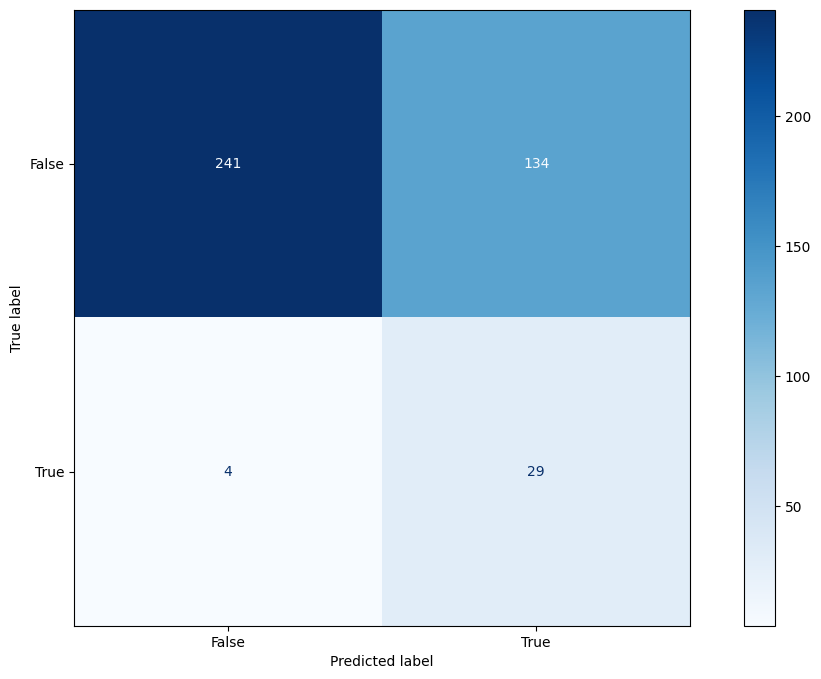

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['False', 'True'])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


#Save the model

In [ ]:
import pickle

In [ ]:
satisfaction=input("If you want to save this model enter 'YES'")
# save model to file
if satisfaction.upper()=="YES":
  pickle.dump(model_gbm, open("/content/drive/MyDrive/trained_model.pickle.dat", "wb"))
  print("Model saved")
else :
  print("Model not saved !")